<a href="https://colab.research.google.com/github/wdittaya/MLWorkshop/blob/main/2025_03_20_CUVIP_SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supservised learning

Supervised learning หมายถึง การเรียนรู้แบบมีผู้สอน โดยปกติแล้วจะเป็นการป้อนชุดข้อมูล $D = \{(\mathbf{x}_i,y_i)\}_{i=1}^n$ โดยที่
- $\mathbf{x}_i$ คือข้อมูลเข้าตัวที่ $i$
- $y_i$ คือ ข้อมูลผลลัพธ์ที่คาดหวังจากข้อมูลเข้า $\mathbf{x}_i$
- มีข้อมูลเข้า-ออกทั้งหมด $n$ คู่

หากสร้างฟังก์ชันทำนาย $f(\mathbf{x}) = \hat{y}$ และให้
- $\hat{y}$ แทนค่าทำนายที่ได้

การฝึกสอน supervised learning model จึงเป็นการปรับฟังก์ชัน $f$ เพื่อให้ $y$ กับ $\hat{y}$ **ตรงกันมากที่สุด** หรือ **ต่างกันน้อยที่สุด**

การนิยามความ**ต่างกัน**ทำได้หลายรูปแบบ เช่น
- ผลรวมของผลต่างกำลังสอง: $\sum_{i=1}^n (\hat{y}-y)^2$
- จำนวนคลาสที่ต่างกัน: $\sum_{i=1}^n \mathcal{I}(\hat{y}=y)$
- Binary cross-entropy: $\sum_{i=1}^n (y \log \hat{y} + (1-\hat{y})\log(y) )$

objective function หรือ เป้าหมายในการฝึกสอนตัวแบบ จึงมักจะเป็นการหาชุดของ parameter ที่ทำให้**ค่าทำนายและค่าจริงต่างกันน้อยที่สุด** - minimize loss

## Regression vs. classification

โดยปกติแล้ว งาน regression จะเป็นการทำนายผลลัพธ์ $y$ ที่เป็นจำนวนต่อเนื่อง ในขณะที่ classification มักจะเป็นการทำนายป้ายกำกับ หรือคลาสของข้อมูล

การมีเป้าหมายการทำนายที่ต่างกัน จะทำให้เราเลือกใช้ objective function (และ loss function) ที่ต่างกันตามไปด้วย เช่น
- Least square เหมาะสำหรับ regression
- Binary cross-entropy เหมาะสำหรับ binary classification

และเทคนิควิธีที่มักใช้ในการฝึกสอน ก็มักจะต่างกันตามไปด้วย

## Data split

เป้าหมายหลักในการสร้าง model โดยทั่วไปคือ เราต้องการใช้ model นี้ กับข้อมูลใหม่ๆ ที่เข้ามา และหวังว่า มันจะทำงานได้ดี ดังนั้น ในการฝึกสอน ควรเป็นการทำให้ model เรียนรู้รูปแบบที่ใช้ในการตัดสินใจ มากกว่าจะเป็นการจำตัวอย่างแบบจำเพาะเจาะจง

เพื่อให้แน่ใจว่า model จะทำงานได้ดีในสถานการณ์จริง จึงต้องมีการแบ่งชุดข้อมูลเพื่อใช้ฝึกสอน และทดสอบ
- ข้อมูลทดสอบจะไม่ถูกนำมาใช้ในการปรับค่าใดๆ ระหว่างการฝึกสอน เพื่อให้คงสถานะเป็นข้อมูลที่ model ไม่เคยเห็น และแทนการใช้งานในสถานการณ์จริงได้
- แต่ในบางกรณี เราอาจจะจำเป็นต้องปรับแต่ง model และต้องมีชุดข้อมูลเพื่อทดสอบว่า การปรับแต่งนี้ทำได้ดีแล้วหรือยัง การใช้ชุดข้อมูลทดสอบเพื่อการนี้ จะทำให้ model ที่ได้จดจำรูปแบบที่ดีสำหัรับชุดทดสอบ แต่ไม่รับรองว่าจะทำงานได้ดีกับข้อมูลใหม่ที่ไม่เคยเห็น ดังนั้น เราจึงมักจะแบ่งชุดข้อมูลฝึกสอนออกมาเป็นชุดเล็กๆ เรียกว่า validation set เพื่อใช้ทดสอบการปรับแต่งเล็กๆ น้อยๆ นี้ โดยไม่ไปแตะต้องชุดข้อมูลทดสอบ

โดยทั่วไป เราจึงจะแบ่งชุดข้อมูลทั้งหมดออกเป็น
1. Training set
    - Training set
    - Validation (อาจจะมีหรือไม่มีก็ได้)
2. Test set

สัดส่วนระหว่าง training และ test data ที่เหมาะสม จะขึ้นกับจำนวนของ sample และ population โดยทั่วไปแล้ว
- หากเรามี training data จำนวนมากพอ model การฝึกสอนจะเป็นการพยายามหารูปแบบร่วมกันของตัวอย่างเพื่อใช้ในการทำนาย แทนที่จะเป็นการจำตัวอย่างเป็นตัวๆ
- และหากมี test data ที่มากพอ ผลการทำนายที่ได้ก็จะมีความน่าเชื่อถือเพิ่มขึ้น

ในกรณีที่มี data ขนาดเล็ก เราอาจพิจารณาฝึกสอนด้วยวิธีเดียวกันหลายๆ รอบกับ train/test data ที่ต่างกันเล็กน้อย เพื่อให้มั่นใจว่าวิธีการที่ใช้จะได้ผลดีจริงในกรณีทั่วๆ ไป ไม่จำเพาะเจาะจงกับการแบ่งข้อมูลรูปแบบเดียว

การแบ่งชุดข้อมูลเป็น train/test set โดยทั่วไปใช้การสุ่มได้ แต่ข้อมูลบางประเภท เช่น time-series data ไม่สามารถใช้การสุ่มตรงๆ ได้ เนื่องจาก เราไม่ควรใช้ข้อมูลในอนาคตมาเป็นพื้นฐานในการฝึกสอน เพื่อทำนายอดีต การแบ่งชุดข้อมูลจึงควรคำนึงถึงลักษณะการใช้งานจริงเหล่านี้ด้วย

## Key takeaway

โดยปกติแล้ว เมื่อต้องการใช้งาน supervised learning ควรคำนึงถึงปัจจัยดังต่อไปนี้
1. มีตัวอย่างข้อมูลเข้า**และผลลัพธ์** ของข้อมูลเข้าแต่ละตัวหรือไม่
    - หากไม่มีตัวอย่างผลลัพธ์ จะไม่สามารถใช้ supervised learning ได้
2. จำนวนข้อมูลตัวอย่างมีมาก-น้อยเพียงใด
    - หากจำนวนข้อมูลมีน้อยจนเกินไป การฝึกสอนจะล้มเหลว โดย model จะมีความสามารถในการ **จำ** ตัวอย่างได้ดี แทนที่จะทำงานได้ดีกับข้อมูลทั่วๆ ไปที่ไม่เคยเห็น
3. ลักษณะข้อมูลออกเป็นแบบใด เป็นข้อมูลต่อเนื่อง หรือคลาส
    - เพื่อเลือกใช้ model และ objective function ให้เหมาะสม

# แบบฝึกหัด

Regression - ทำนายความเข้มแสงอาทิตย์ที่ใช้การผลิตไฟฟ้าจากแผงโซลาร์เซลล์ (Irradiance)

ข้อมูลอ้างอิง
- `Datetime`

ข้อมูลออก
- `I` : Irradiance ความเข้มแสงอาทิตย์

ข้อมูลเข้า
- `Temperature` : อุณหภูมิ
- `Relative_Humidity` : ความชื้น
- `Pressure` : ความดัน
- `Wind_speed` : ความเร็วลม
- `Wind_direction` : ทิศทางลม
- `Rainfall` : ปริมาณน้ำฝน
- `Short_wave_irradiation` : รังสีคลื่นสั้น
- `Iclr`: ความเข้มแสงอาทิตย์เมื่อฟ้าใส
- `hour_index` : ระยะห่างจากเที่ยงวัน
- `I_lag30`: ความเข้มแสงอาทิตย์ย้อนหลัง 30 นาที
- `I_lag45`: ความเข้มแสงอาทิตย์ย้อนหลัง 45 นาที
- `CI_lag30`: clear sky index ย้อนหลัง 30 นาที
- `R_lag30`: R channel จาก cloud image ย้อนหลัง 30 นาที

**Reference**

[Probabilistic Solar Power Forecasting Using Multi-Objective Quantile Regression](https://ieeexplore.ieee.org/document/10667174/)

https://github.com/energyCUEE/probforecast/


# Download dataset

In [ ]:
!wget https://raw.githubusercontent.com/energyCUEE/probforecast/refs/heads/main/data/solar_experiment/features_selection/site001_dataprepare_forecast_morning.csv
!wget https://raw.githubusercontent.com/energyCUEE/probforecast/refs/heads/main/data/solar_experiment/features_selection/site001_dataprepare_forecast_noon.csv
!wget https://raw.githubusercontent.com/energyCUEE/probforecast/refs/heads/main/data/solar_experiment/features_selection/site001_dataprepare_forecast_evening.csv

--2025-03-20 05:33:35--  https://raw.githubusercontent.com/energyCUEE/probforecast/refs/heads/main/data/solar_experiment/features_selection/site001_dataprepare_forecast_morning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 588548 (575K) [text/plain]
Saving to: ‘site001_dataprepare_forecast_morning.csv’

site001_dataprepare 100%[===================>] 574.75K  --.-KB/s    in 0.05s   

2025-03-20 05:33:35 (11.0 MB/s) - ‘site001_dataprepare_forecast_morning.csv’ saved [588548/588548]

--2025-03-20 05:33:35--  https://raw.githubusercontent.com/energyCUEE/probforecast/refs/heads/main/data/solar_experiment/features_selection/site001_dataprepare_forecast_noon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.13

Load dataset from csv file

In [ ]:
# prompt: load all site001 data

import pandas as pd

# Load the dataset from the CSV file
df_morning = pd.read_csv('site001_dataprepare_forecast_morning.csv', parse_dates=['Datetime'])
df_noon = pd.read_csv('site001_dataprepare_forecast_noon.csv', parse_dates=['Datetime'])
df_evening = pd.read_csv('site001_dataprepare_forecast_evening.csv', parse_dates=['Datetime'])

# Concatenate all dataframes
df = pd.concat([df_morning, df_noon, df_evening], ignore_index=True)

# Now you have all site001 data loaded into a single dataframe
print(df.head())
print(df.info())


             Datetime  Temperature  Relative_Humidity  Pressure  Wind_speed  \
0 2022-04-01 08:45:00       308.13              38.32   1006.13        5.71   
1 2022-04-01 09:00:00       308.06              38.34   1005.97        5.80   
2 2022-04-01 09:15:00       307.70              39.64   1006.15        5.90   
3 2022-04-01 09:30:00       307.33              40.95   1006.33        6.02   
4 2022-04-01 09:45:00       306.97              42.25   1006.51        6.14   

   Wind_direction  Rainfall  Short_wave_irradiation         I        Iclr  \
0           28.78       0.0                278.2168  536.3066  594.551229   
1           28.60       0.0                239.3480  604.1268  653.535674   
2           30.95       0.0                202.4816  661.4119  709.505601   
3           33.21       0.0                167.9160  723.4158  762.194726   
4           35.38       0.0                135.9256  773.8237  811.358317   

   hour_index   I_lag30   I_lag45  CI_lag30   R_lag30  
0     

In [ ]:
df.dtypes

,0
Datetime,datetime64[ns]
Temperature,float64
Relative_Humidity,float64
Pressure,float64
Wind_speed,float64
Wind_direction,float64
Rainfall,float64
Short_wave_irradiation,float64
I,float64
Iclr,float64


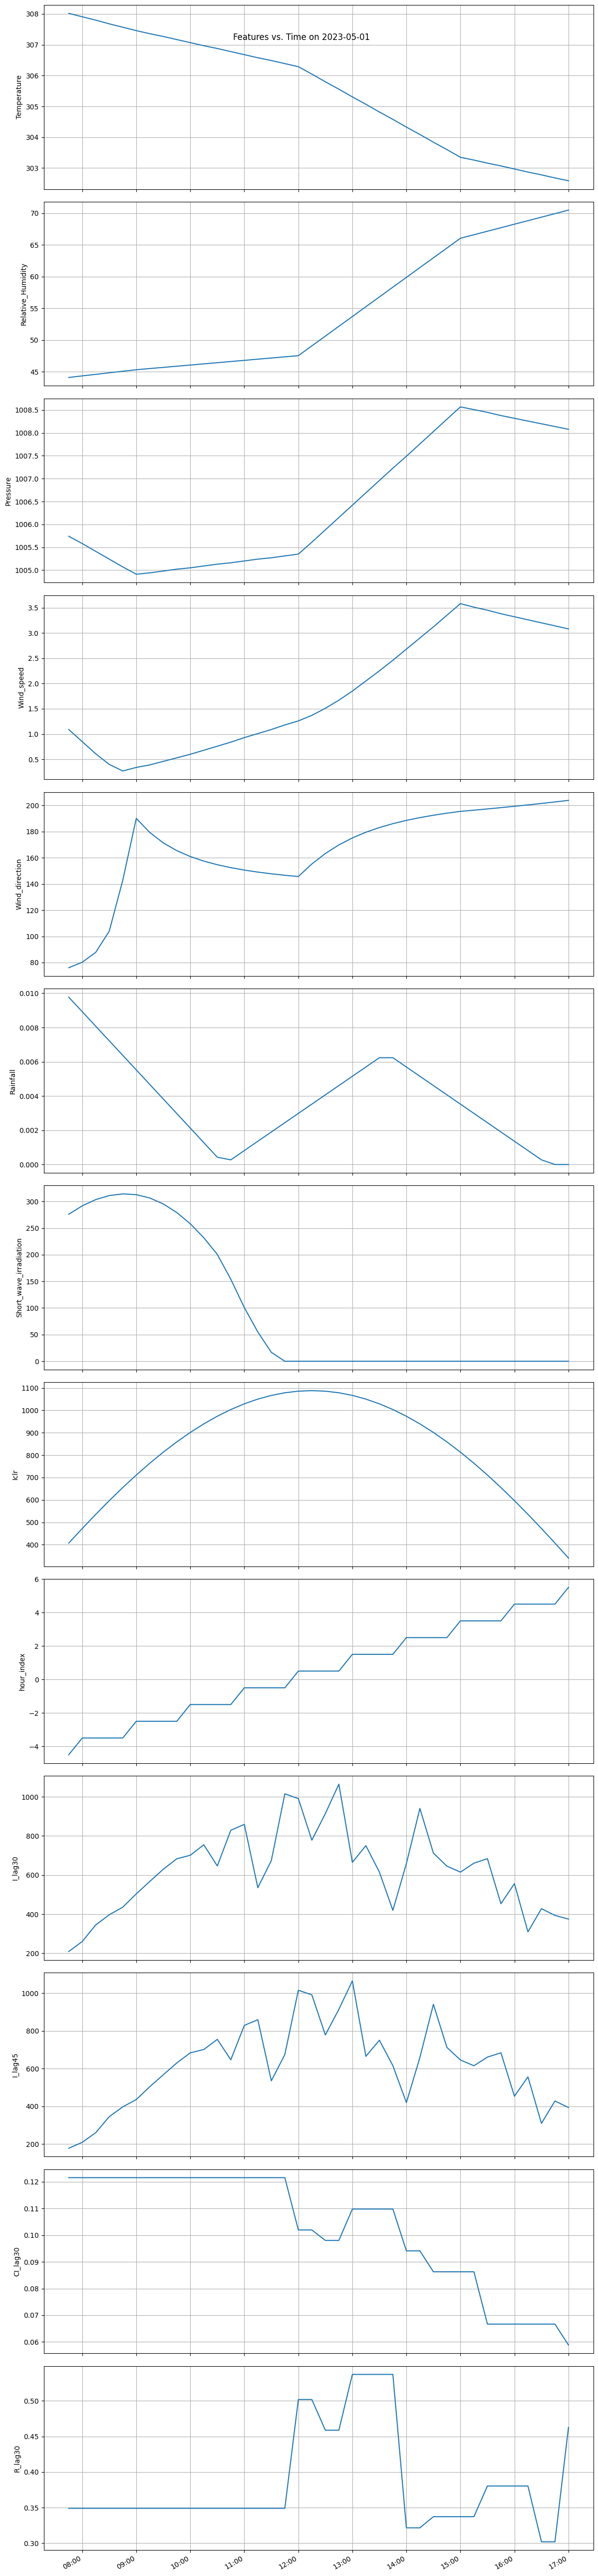

In [ ]:
# prompt: Plot all features as subfig vs time in hh:mm on 2023-05-01

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have already loaded the dataframe 'df' as shown in the previous code

# Filter data for the date 2023-05-01
df_may1 = df[df['Datetime'].dt.date == pd.to_datetime('2023-05-01').date()]

# Get a list of feature columns (excluding 'Datetime' and 'I')
feature_cols = [col for col in df_may1.columns if col not in ['Datetime', 'I']]

# Create a figure and subplots
num_features = len(feature_cols)
fig, axes = plt.subplots(num_features, 1, figsize=(12, 4 * num_features), sharex=True)

# Loop through feature columns and plot each one vs. time
for i, feature in enumerate(feature_cols):
    axes[i].plot(df_may1['Datetime'], df_may1[feature])
    axes[i].set_ylabel(feature)
    axes[i].grid(True)

# Format x-axis to display time in hh:mm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()

# Set a title for the entire plot
plt.suptitle("Features vs. Time on 2023-05-01")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



## Data split

In [ ]:
# prompt: แบ่งข้อมูลเป็น train/test แบบ time series

train_ratio = 0.8  # เปอร์เซ็นต์ของข้อมูลที่ใช้สำหรับฝึกฝน

# เรียงข้อมูลตามลำดับเวลา
df.sort_values('Datetime', inplace=True)

# หาจุดแบ่งข้อมูลสำหรับ train/test
train_size = int(len(df) * train_ratio)

# แบ่งข้อมูลเป็น train/test
train_df = df[:train_size]
test_df = df[train_size:]

print(f"Train data size: {len(train_df)}")
print(f"Test data size: {len(test_df)}")


Train data size: 12710
Test data size: 3178


In [ ]:
# prompt: train linear regression และ test วัด mean square error

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data
X_train = train_df.drop('I', axis=1)
y_train = train_df['I']
X_test = test_df.drop('I', axis=1)
y_test = test_df['I']

# Drop 'Datetime' column as it is not a numerical feature
if 'Datetime' in X_train.columns:
  X_train = X_train.drop('Datetime', axis=1)
if 'Datetime' in X_test.columns:
  X_test = X_test.drop('Datetime', axis=1)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 16095.626749859115


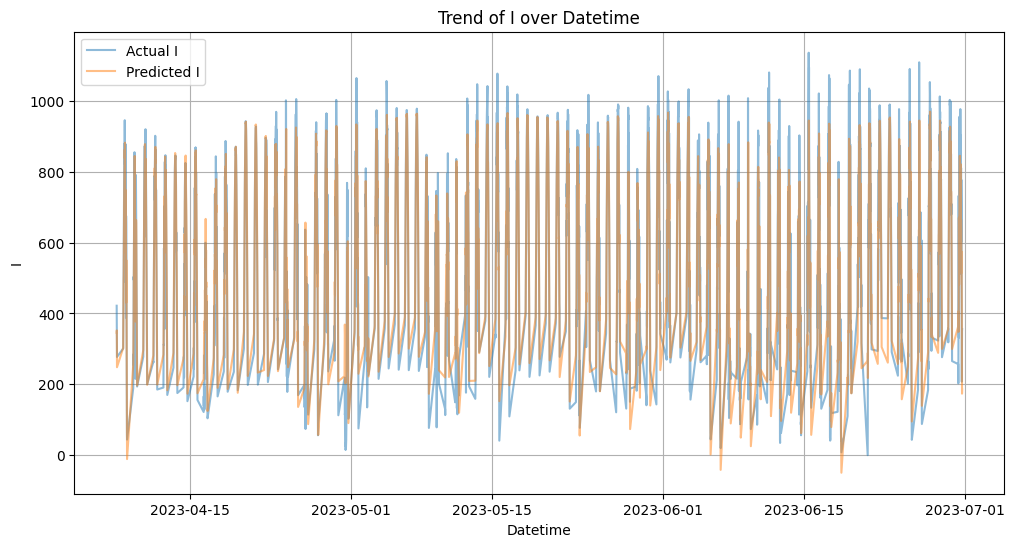

In [ ]:
# prompt: Trend plot I over Datetime with 50% transparent color

import matplotlib.pyplot as plt

# Assuming you have 'y_test' and 'test_df' from your previous code
plt.figure(figsize=(12, 6))
plt.plot(test_df['Datetime'], y_test, label='Actual I', alpha=0.5)
plt.plot(test_df['Datetime'], y_pred, label='Predicted I', alpha=0.5)  # Set alpha for transparency
plt.xlabel('Datetime')
plt.ylabel('I')
plt.title('Trend of I over Datetime')
plt.legend()
plt.grid(True)
plt.show()


Random Forest Mean Squared Error: 15939.308735991328


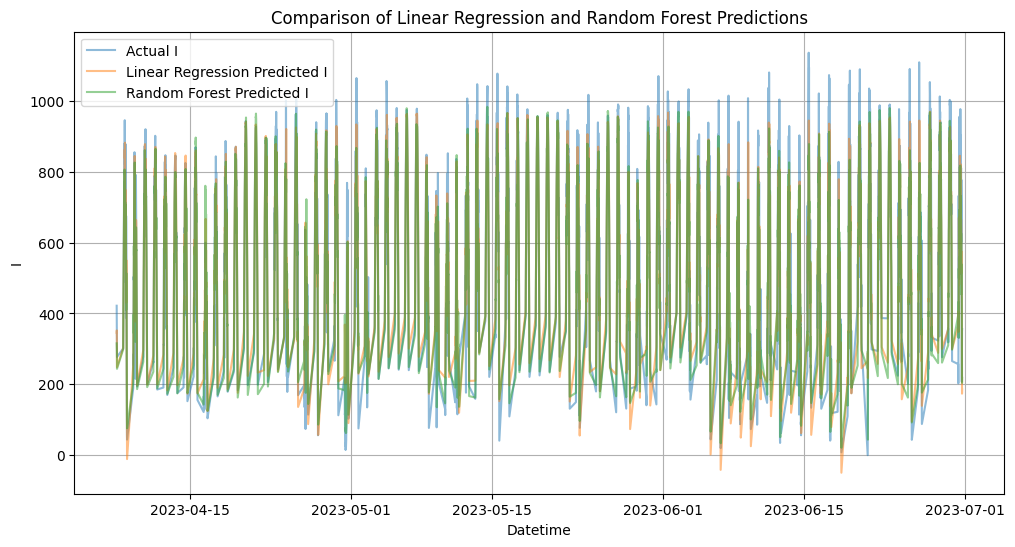

In [ ]:
# prompt: Find time-series prediction model that fit train_df
# plot เทียบกับ linear regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Train RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_rf_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error
rf_mse = mean_squared_error(y_test, y_rf_pred)

print(f"Random Forest Mean Squared Error: {rf_mse}")

# Plot the results for both linear regression and Random Forest
plt.figure(figsize=(12, 6))
plt.plot(test_df['Datetime'], y_test, label='Actual I', alpha=0.5)
plt.plot(test_df['Datetime'], y_pred, label='Linear Regression Predicted I', alpha=0.5)
plt.plot(test_df['Datetime'], y_rf_pred, label='Random Forest Predicted I', alpha=0.5)
plt.xlabel('Datetime')
plt.ylabel('I')
plt.title('Comparison of Linear Regression and Random Forest Predictions')
plt.legend()
plt.grid(True)
plt.show()


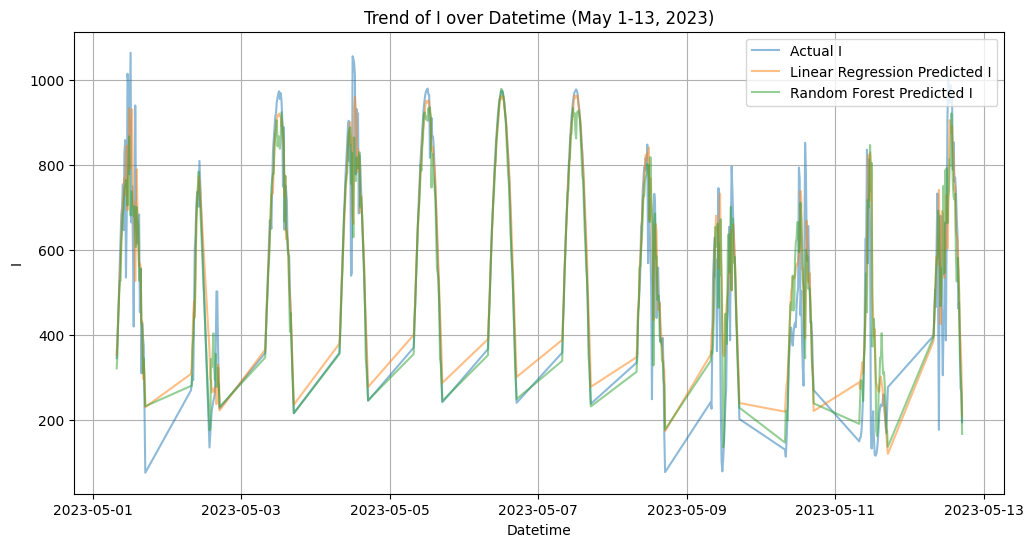

In [ ]:
# prompt: Choose date between 2023-05-01 to 2023-05-13 and plot

import matplotlib.pyplot as plt
# Assuming you have 'test_df', 'y_test', and 'y_pred' from your previous code

# Choose the date range you want to plot
start_date = '2023-05-01'
end_date = '2023-05-13'

# Filter the test dataframe based on the date range
filtered_test_df = test_df[(test_df['Datetime'] >= start_date) & (test_df['Datetime'] <= end_date)]

# Extract corresponding y_test and y_pred values
filtered_y_test = y_test[(test_df['Datetime'] >= start_date) & (test_df['Datetime'] <= end_date)]
filtered_y_pred = y_pred[(test_df['Datetime'] >= start_date) & (test_df['Datetime'] <= end_date)]
filtered_y_rf_red = y_rf_pred[(test_df['Datetime'] >= start_date) & (test_df['Datetime'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_test_df['Datetime'], filtered_y_test, label='Actual I', alpha=0.5)
plt.plot(filtered_test_df['Datetime'], filtered_y_pred, label='Linear Regression Predicted I', alpha=0.5)
plt.plot(filtered_test_df['Datetime'], filtered_y_rf_red, label='Random Forest Predicted I', alpha=0.5)
plt.xlabel('Datetime')
plt.ylabel('I')
plt.title('Trend of I over Datetime (May 1-13, 2023)')
plt.legend()
plt.grid(True)
plt.show()


## สิ่งที่ให้ทำ
- เปลี่ยนจาก LinearRegression เป็น Lasso และ Ridge เพื่อดูว่าได้ MSE ใน test set เป็นเท่าใด
- เมื่อเปรียบ Lasso, Ridge กับ LinearRegression และ RandomForestRegressor ที่ทดลองในตัวอย่าง model ใดให้ผลดีที่สุด